## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train_cleaned.csv')
valid_data = pd.read_csv('./data/test.csv')

In [2]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,0.0,403.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [3]:
valid_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


In [4]:
train_data.nunique()

Id                                170000
Band Name                             54
Band Genre                             7
Band Country of Origin                 3
Band Debut                            34
Concert ID                          1000
Concert Attendance                     9
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2000
Personnality Trait 3                2000
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2001
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

In [5]:
valid_data.nunique()

Id                                30000
Band Name                            54
Band Genre                            8
Band Country of Origin                4
Band Debut                           34
Concert ID                         1000
Concert Attendance                   18
Inside Venue                          2
Rain                                  2
Seated                                2
Personnality Trait 1               2000
Personnality Trait 2               2037
Personnality Trait 3               2043
Personnality Trait 4               2000
Concert Goer Age                     61
Concert Goer ID                    2000
Height (cm)                          51
Concert Goer Country of Origin      152
dtype: int64

In [6]:
# Observe correlation between personnalities

train_data[['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4']].corr()



,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4
Personnality Trait 1,1.000000,-0.000610,-0.024786,-0.028107
Personnality Trait 2,-0.000610,1.000000,-0.029234,-0.006077
Personnality Trait 3,-0.024786,-0.029234,1.000000,0.031350
Personnality Trait 4,-0.028107,-0.006077,0.031350,1.000000


In [2]:
# Convert "Insert Band Name" "Insert Band Genre" "Insert Band Country of Origin" to NaN

train_data = train_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})
valid_data = valid_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})

In [3]:
train_data = train_data.dropna()

In [4]:
train_data.nunique()

Id                                169168
Band Name                             53
Band Genre                             7
Band Country of Origin                 3
Band Debut                            34
Concert ID                          1000
Concert Attendance                     9
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2000
Personnality Trait 3                2000
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2000
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

### One hot encoder method for "Band Genre", "Band Country of Origin", "Band Name", "Concert Goer Country of Origin"

In [5]:
# remove "Concert Goer ID" and "Concert ID" column
train_data = train_data.drop(['Concert Goer ID'], axis=1)
train_data = train_data.drop(['Id'], axis=1)

In [6]:
valid_data = valid_data.drop(['Concert Goer ID'], axis=1)
valid_data = valid_data.drop(['Id'], axis=1)

In [7]:
def normalize(df):
    df['Band Debut'] = (df['Band Debut'] - df['Band Debut'].min()) / (df['Band Debut'].max() - df['Band Debut'].min())
    df['Concert ID'] = (df['Concert ID'] - df['Concert ID'].min()) / (df['Concert ID'].max() - df['Concert ID'].min())
    df['Concert Attendance'] = (df['Concert Attendance'] - df['Concert Attendance'].min()) / (df['Concert Attendance'].max() - df['Concert Attendance'].min())
    df['Personnality Trait 1'] = (df['Personnality Trait 1'] - df['Personnality Trait 1'].min()) / (df['Personnality Trait 1'].max() - df['Personnality Trait 1'].min())
    df['Personnality Trait 2'] = (df['Personnality Trait 2'] - df['Personnality Trait 2'].min()) / (df['Personnality Trait 2'].max() - df['Personnality Trait 2'].min())
    df['Personnality Trait 3'] = (df['Personnality Trait 3'] - df['Personnality Trait 3'].min()) / (df['Personnality Trait 3'].max() - df['Personnality Trait 3'].min())
    df['Personnality Trait 4'] = (df['Personnality Trait 4'] - df['Personnality Trait 4'].min()) / (df['Personnality Trait 4'].max() - df['Personnality Trait 4'].min())
    df['Concert Goer Age'] = (df['Concert Goer Age'] - df['Concert Goer Age'].min()) / (df['Concert Goer Age'].max() - df['Concert Goer Age'].min())
    df['Height (cm)'] = (df['Height (cm)'] - df['Height (cm)'].min()) / (df['Height (cm)'].max() - df['Height (cm)'].min())
    
    
    return df

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

NN = True
# Apply ont hot ender to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(valid_data[['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))

# One hot encoding removed index; put it back
OH_cols_train.index = train_data.index
OH_cols_valid.index = valid_data.index

# Remove categorical columns (will replace with one-hot encoding)
numeric_train_data = train_data.drop(['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"], axis=1)
numeric_valid_data = valid_data.drop(['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"], axis=1)

# Normalize datas for nn
if NN:
    numeric_train_data = normalize(numeric_train_data)
    numeric_valid_data = normalize(numeric_valid_data)

# Add one-hot encoded columns to numerical features
train_data = pd.concat([OH_cols_train,numeric_train_data], axis=1)
valid_data = pd.concat([OH_cols_valid,numeric_valid_data], axis=1)



In [9]:
enjoyment_dictionary = {"Worst Concert Ever":0, "Did Not Enjoy":1, "Enjoyed":2, "Best Concert Ever":3}
train_data = train_data.replace({'Concert Enjoyment':enjoyment_dictionary})

In [10]:
train_data = train_data.replace({'Concert Enjoyment':enjoyment_dictionary})

In [11]:
# Convert all false value to 0 and all true value to 1
train_data = train_data.replace({False: 0, True: 1})
valid_data = valid_data.replace({False: 0, True: 1})

In [13]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split


# train model using "Concert Enjoyment" column as output
X = np.array(train_data.values[:,:-1], dtype = np.float32)
# output is "Concert Enjoyment" column
y = np.array(train_data.values[:,-1], dtype = np.float32)

# PCA on data
NumberComponents = 80
pca1 = PCA(n_components=NumberComponents)
principalComponents_train = pca1.fit_transform(X)
train_data_red = pd.DataFrame(data = principalComponents_train
             , columns = ['Principal Component '+ str(i) for i in range(1, NumberComponents+1)])

train_data_red = pd.concat([train_data_red, pd.DataFrame(data = y, columns = ['Concert Enjoyment'])], axis = 1)


# train model using "Concert Enjoyment" column as output
X = train_data_red.values[:,:-1]
# output is "Concert Enjoyment" column
y = train_data_red.values[:,-1]
np.sum(pca1.explained_variance_ratio_)




0.9718039501957423

In [14]:
# Process test data
val_size = 0.2
seed = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

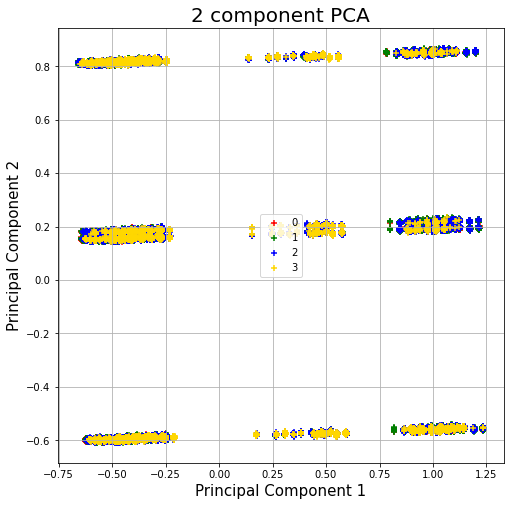

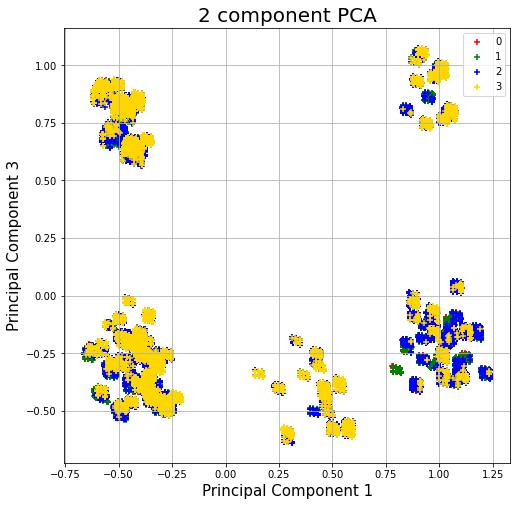

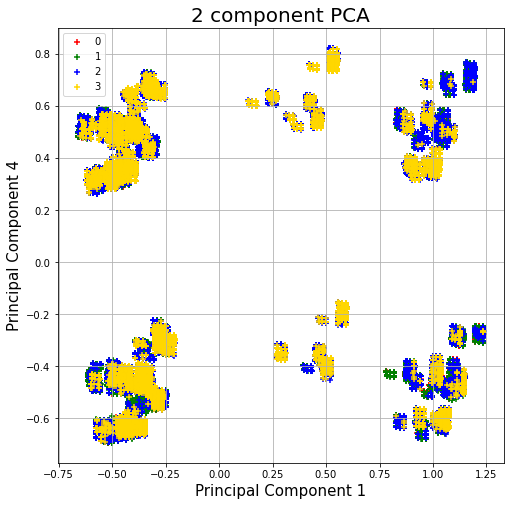

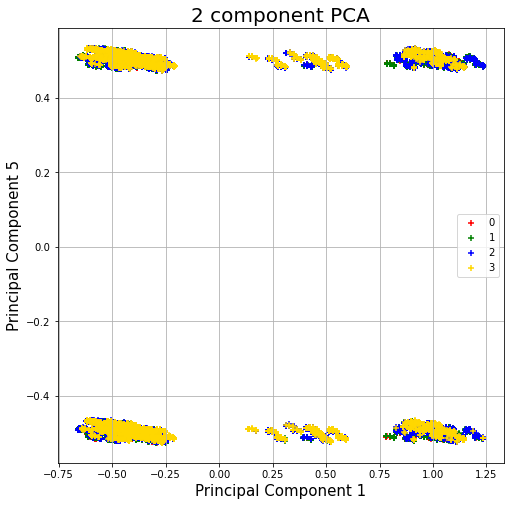

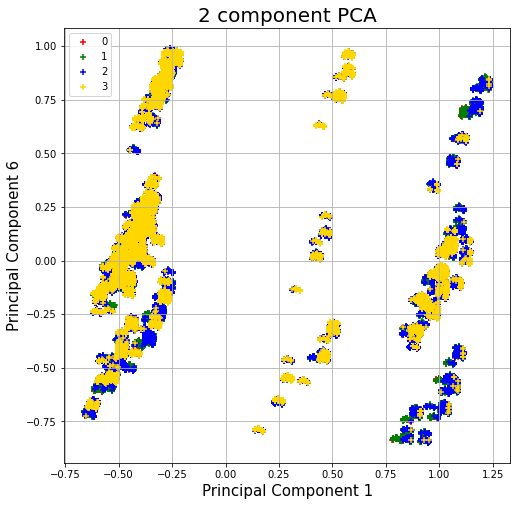

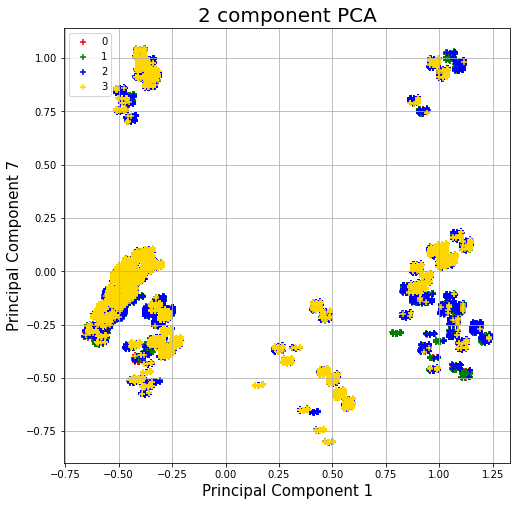

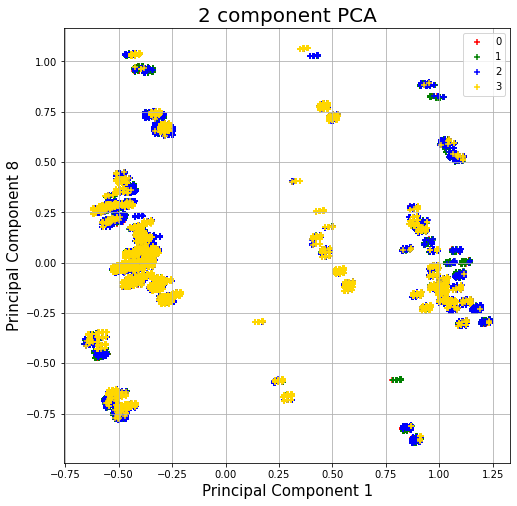

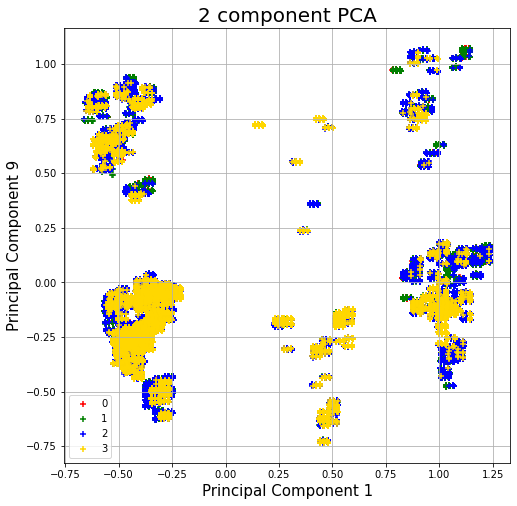

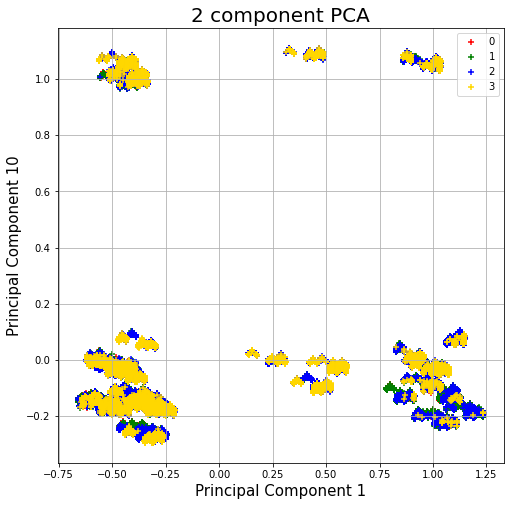

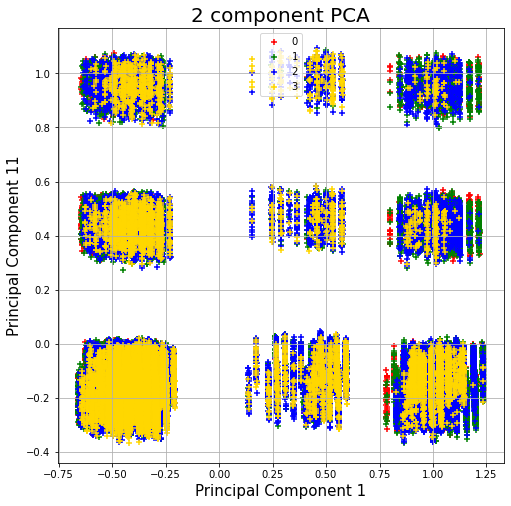

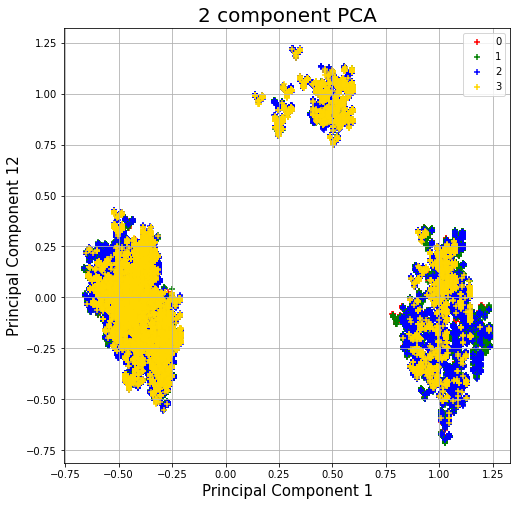

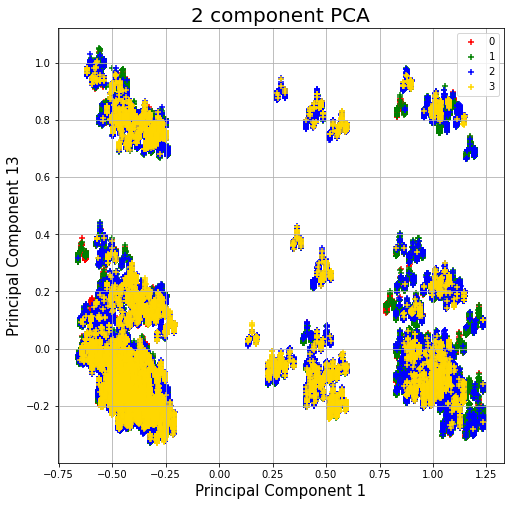

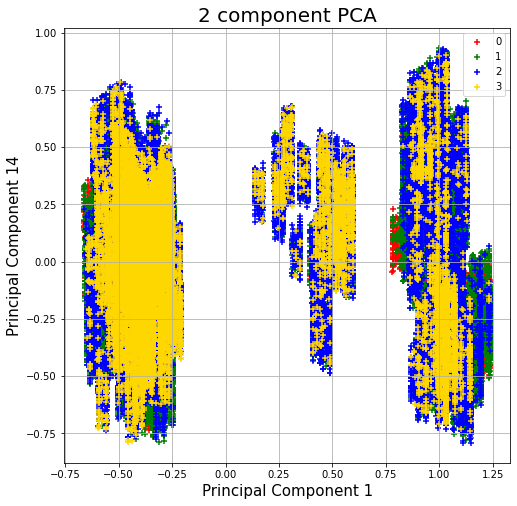

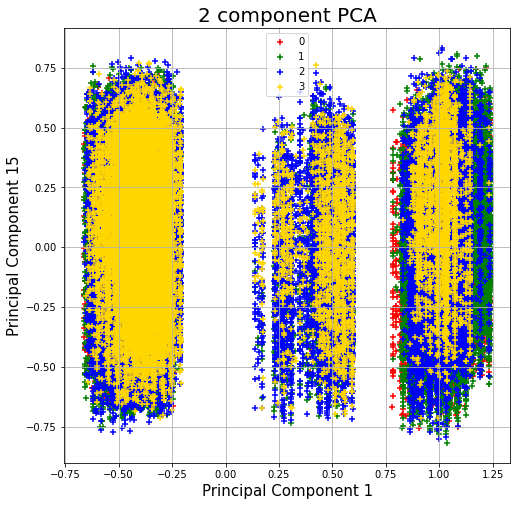

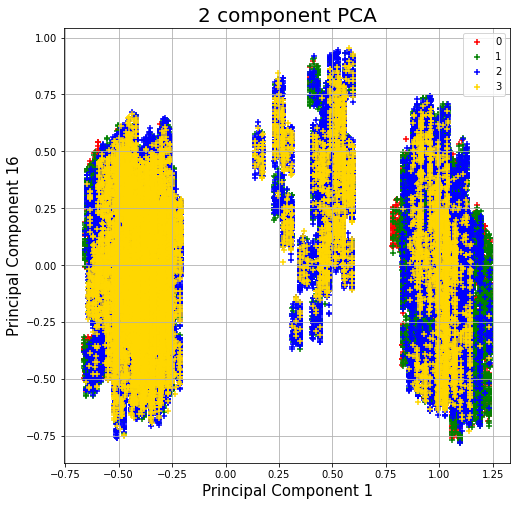

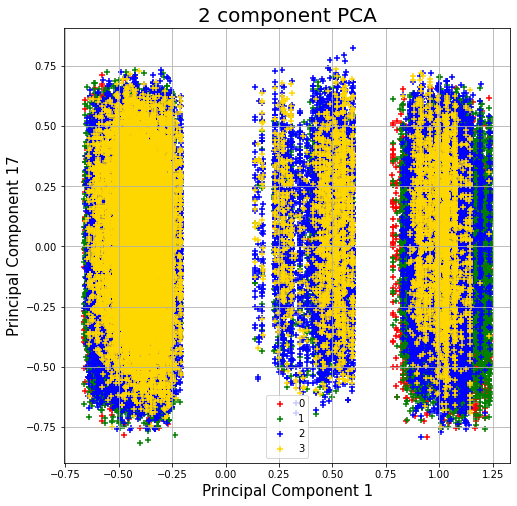

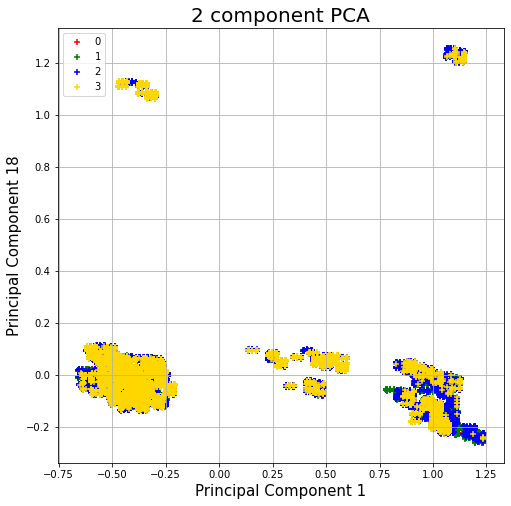

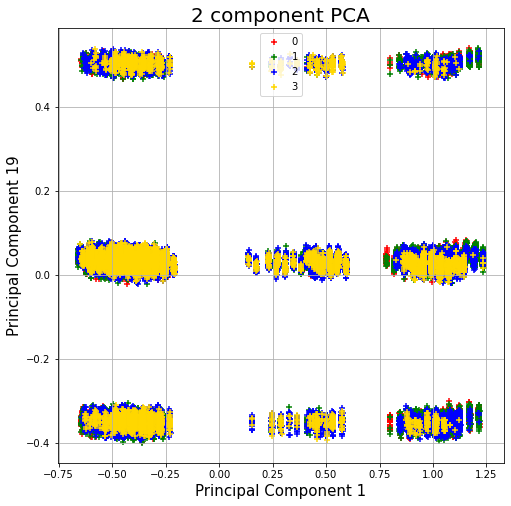

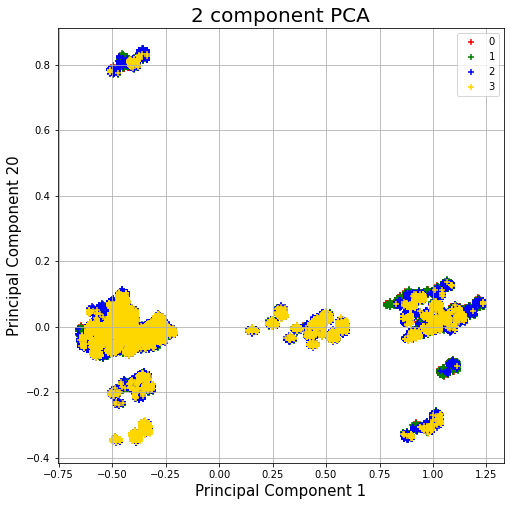

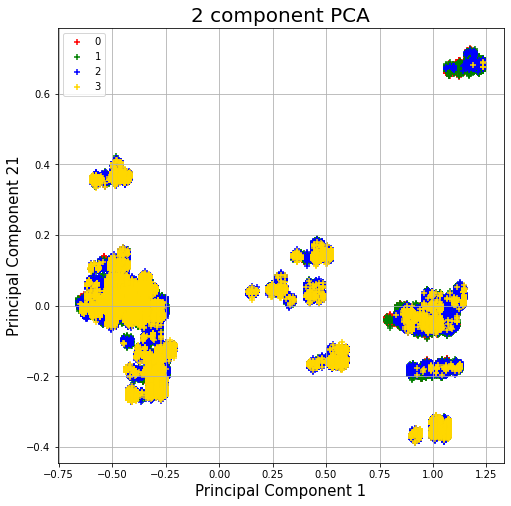

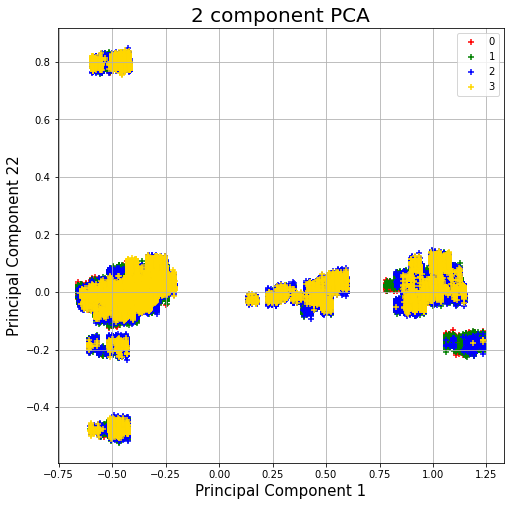

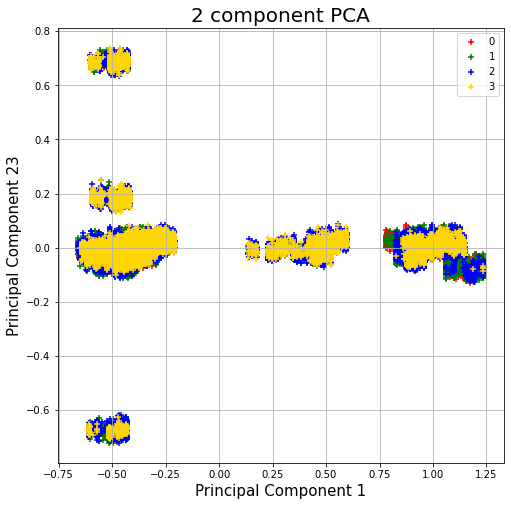

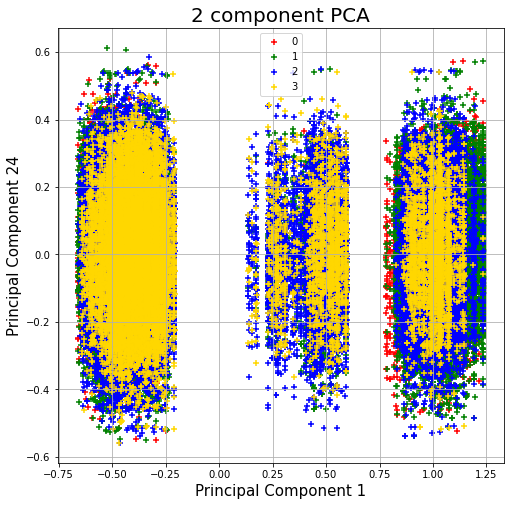

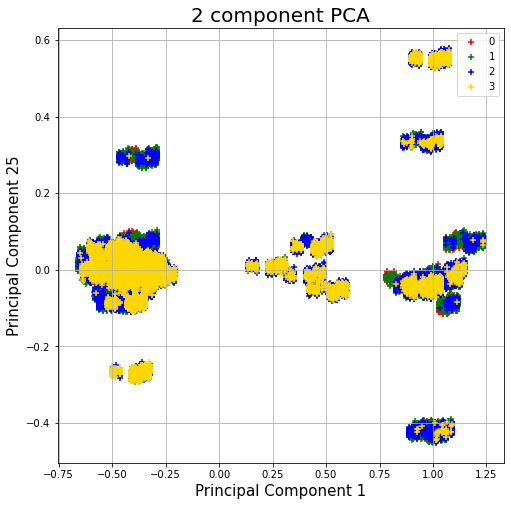

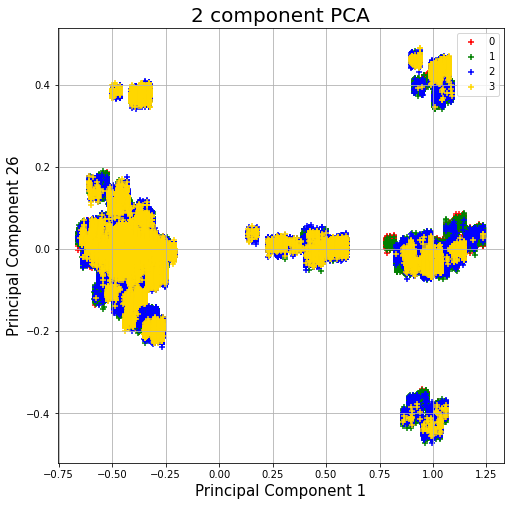

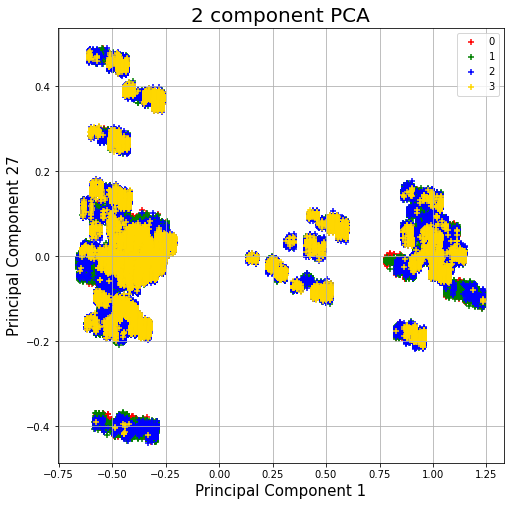

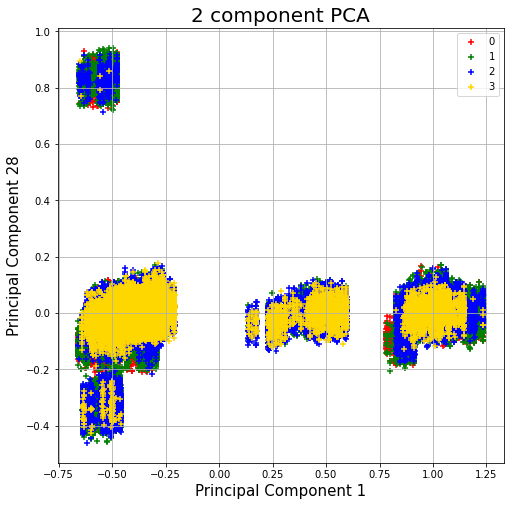

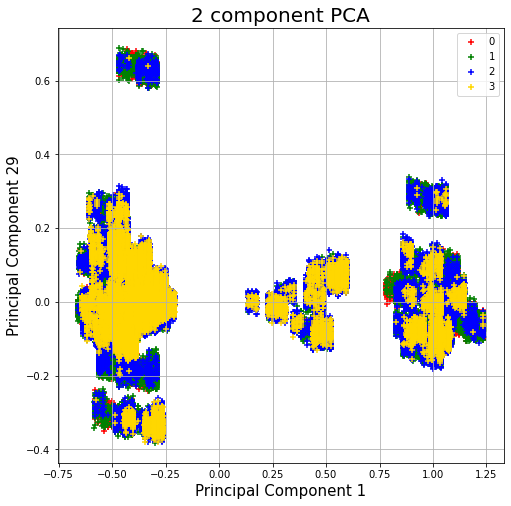

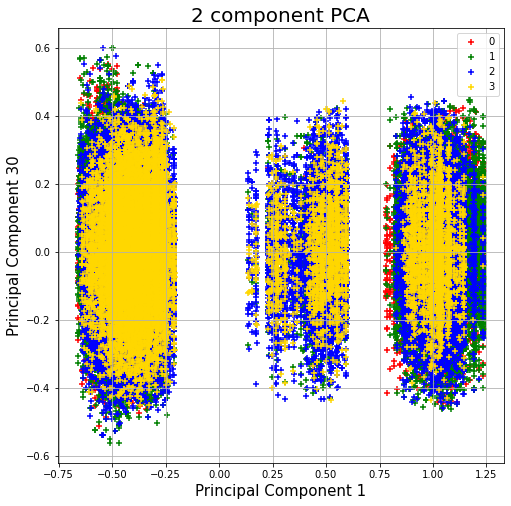

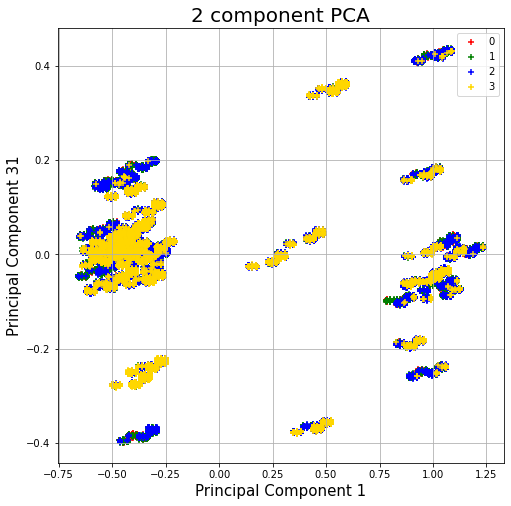

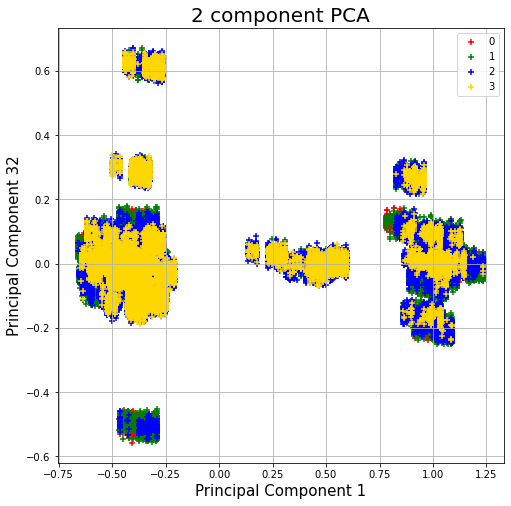

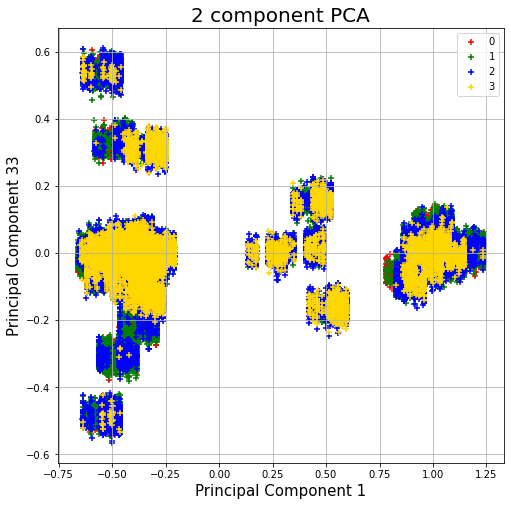

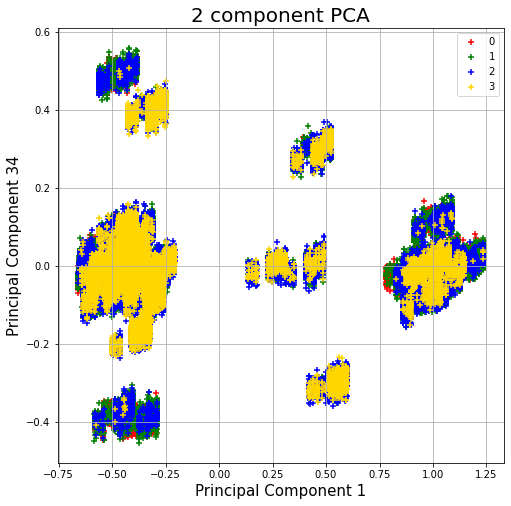

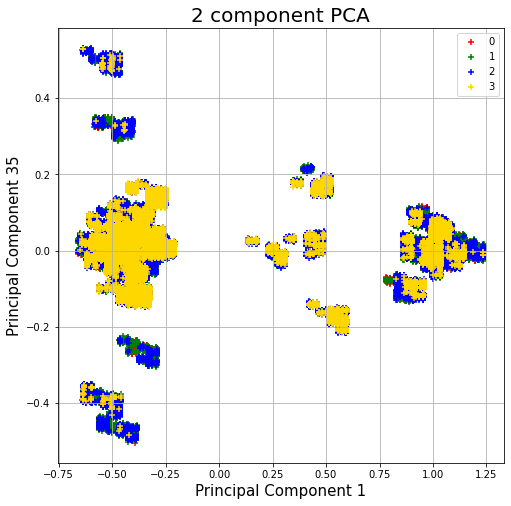

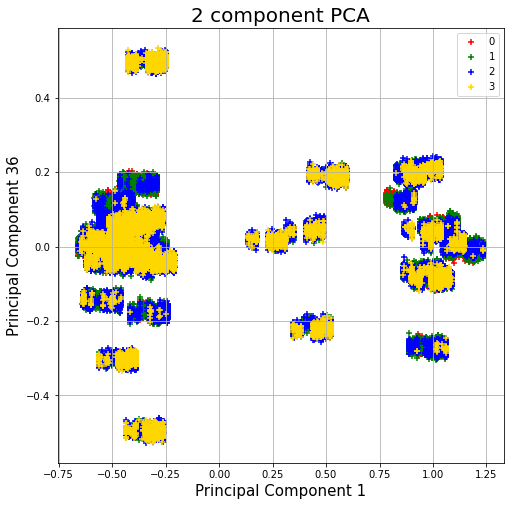

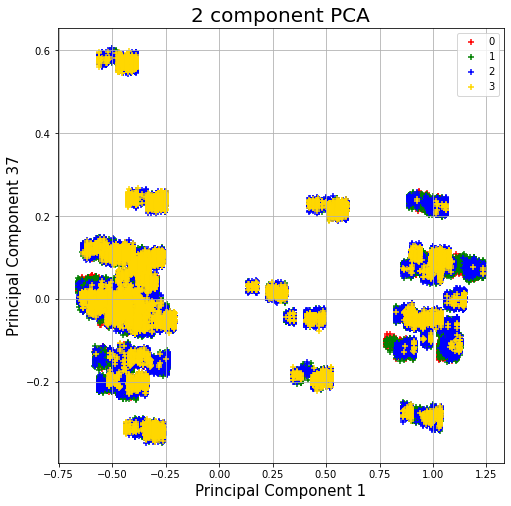

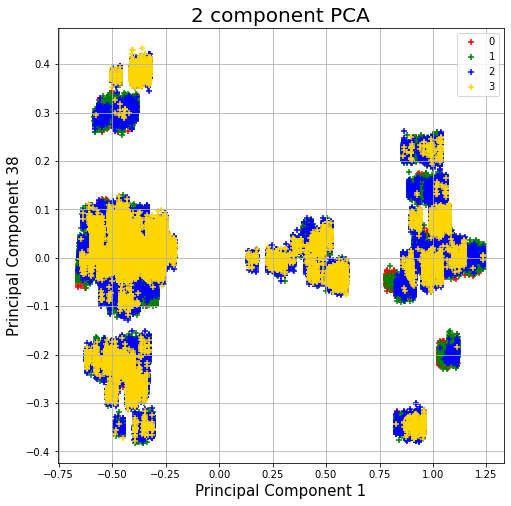

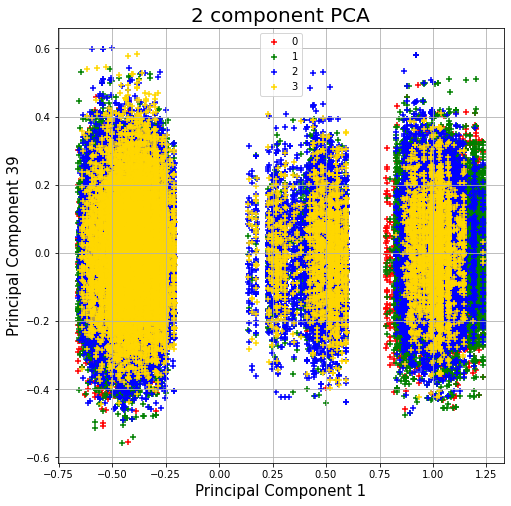

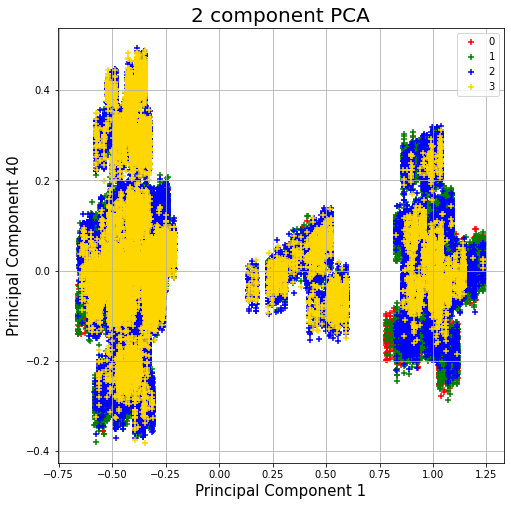

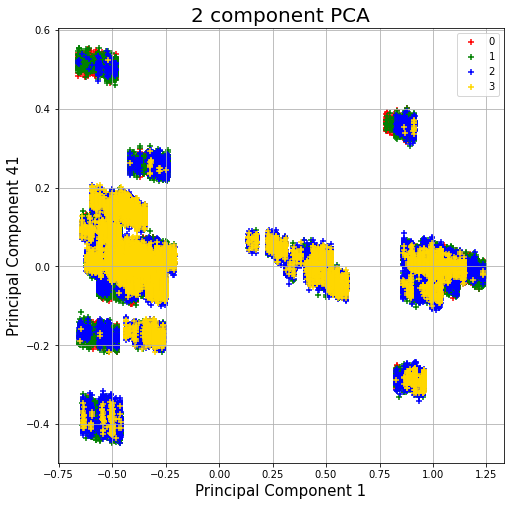

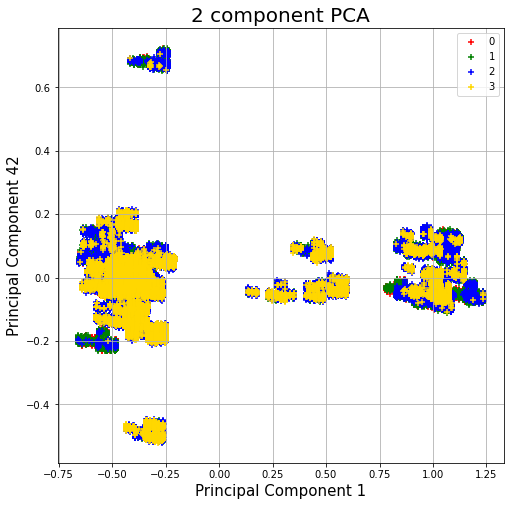

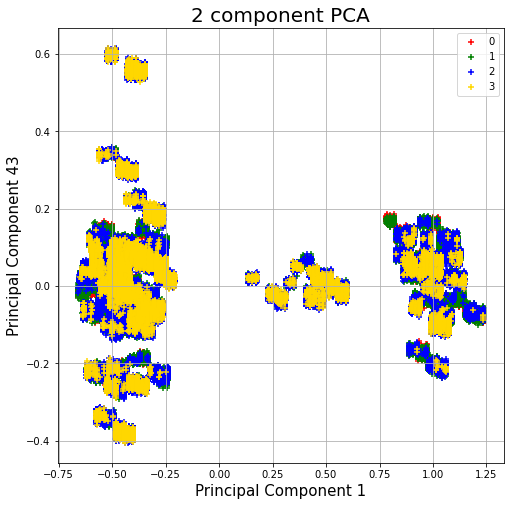

KeyboardInterrupt: 

In [21]:
# 2D visualization

for Componentx in range(1, NumberComponents + 1):
    for Componenty in range(Componentx + 1, NumberComponents + 1):
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1)
        ax.set_xlabel('Principal Component ' + str(Componentx), fontsize = 15)
        ax.set_ylabel('Principal Component ' + str(Componenty), fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        targets = [0, 1, 2, 3]
        colors = ['r', 'g', 'blue', 'gold']
        for target, color in zip(targets,colors):
            indicesToKeep = train_data_red['Concert Enjoyment'] == target
            ax.scatter(train_data_red.loc[indicesToKeep, 'Principal Component ' + str(Componentx)]
                    , train_data_red.loc[indicesToKeep, 'Principal Component ' + str(Componenty)]
                    , c = color, marker = '+')
        ax.legend(targets)
        ax.grid()
        plt.show()

In [ ]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

c:\Users\gouri\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6742923240047554

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
pd.cross_tab(y_test, clf.predict(X_test))

[[1419 1713   16    0]
 [ 661 9204 2633   10]
 [  12 2539 9327  551]
 [   0   22 1980 1036]]
              precision    recall  f1-score   support

         0.0       0.68      0.45      0.54      3148
         1.0       0.68      0.74      0.71     12508
         2.0       0.67      0.75      0.71     12429
         3.0       0.65      0.34      0.45      3038

    accuracy                           0.67     31123
   macro avg       0.67      0.57      0.60     31123
weighted avg       0.67      0.67      0.67     31123



AttributeError: module 'pandas' has no attribute 'cross_tab'

In [ ]:
clf = XGBClassifier(n_estimators=1500, max_depth=20, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
pd.cross_tab(y_test, clf.predict(X_test))

### Test avec Random Forest

----

In [ ]:
clf = RandomForestClassifier(n_estimators=500, max_depth=25)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6490055585901102

---

In [ ]:
# do grid search
from sklearn.model_selection import GridSearchCV

param_grid = { 
    '"n_estimators': [1500,2000, 2500],
    'max_depth': [5],
    'colsample_bytree': [1,0.6, 0.8],
    'subsample': [0.9, 0.8, 1]
}

In [ ]:
clf = XGBClassifier()
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 2, verbose=1, n_jobs=2)
CV_clf.fit(X_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[11:58:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { ""n_estimators" } are not used.



GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=2,
             param_grid={'"n_estimators': [1500, 2000, 2500],
                         'colsample_bytree': [1, 0.6, 0.8], 'max_depth': [5],
                         'subsample': [0.9, 0.8, 1]},
             verbose=1)

In [ ]:
CV_clf.best_params_

{'"n_estimators': 1500,
 'colsample_bytree': 0.8,
 'max_depth': 5,
 'subsample': 0.9}

## Neural network

In [15]:
def neural_network(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter, learning_rate, solver='adam', activation = 'relu'):
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, max_iter = max_iter, learning_rate_init=learning_rate, solver = solver, activation = activation, random_state = 1)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro'), clf

In [23]:
import numpy.random as npr
Ntest = 6
T1 = npr.randint(1, 100, Ntest)
T2 = npr.randint(1, 100, (2, Ntest))
T3 = npr.randint(1, 100, (3, Ntest))
T4 = npr.randint(1, 100, (4, Ntest))


hidden_layer_sizes_values = []
for i in range(Ntest):
    hidden_layer_sizes_values.append((T1[i],))
for i in range(Ntest):
    hidden_layer_sizes_values.append((T2[0, i], T2[1, i]))
for i in range(Ntest):
    hidden_layer_sizes_values.append((T3[0, i], T3[1, i], T3[2, i]))
for i in range(Ntest):
    hidden_layer_sizes_values.append((T4[0, i], T4[1, i], T4[2, i], T4[3, i]))
    
hidden_layer_sizes_values

[(3,),
 (87,),
 (99,),
 (43,),
 (77,),
 (65,),
 (76, 6),
 (86, 62),
 (2, 86),
 (70, 85),
 (12, 48),
 (59, 31),
 (76, 56, 38),
 (28, 88, 43),
 (33, 55, 21),
 (80, 58, 80),
 (83, 34, 35),
 (84, 47, 43),
 (26, 63, 82, 43),
 (57, 78, 6, 89),
 (33, 49, 62, 39),
 (27, 51, 48, 33),
 (69, 28, 16, 20),
 (45, 13, 67, 30)]

In [26]:


# hidden_layer_sizes_values = [(43, 60)]
# max_iter_values = [100, 200, 300, 400, 500] peut-être pas assez
max_iter_values = [1000]
learning_rate_values = [1e-3]

f1_scores_nn = np.zeros((len(hidden_layer_sizes_values), len(max_iter_values), len(learning_rate_values)))

i = 0
for hidden_layer_sizes in hidden_layer_sizes_values:
    j = 0
    for max_iter in max_iter_values:
        k = 0
        for learning_rate in learning_rate_values:
            f1_scores_nn[i,j,k], clf = neural_network(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter, learning_rate = learning_rate, solver = 'adam')
            print("Pour {} score de {}".format(hidden_layer_sizes, f1_scores_nn[i,j,k]))
            k += 1
        j += 1
    i += 1

Pour (3,) score de 0.6163031270319796
Pour (87,) score de 0.6517408523969971
Pour (99,) score de 0.6505290536147071
Pour (43,) score de 0.6505586096825678
Pour (77,) score de 0.6514748477862505
Pour (65,) score de 0.6530413193828694
Pour (76, 6) score de 0.6515044038541112
Pour (86, 62) score de 0.6338889874091151
Pour (2, 86) score de 0.6171306969320801
Pour (70, 85) score de 0.6405391026777798
Pour (12, 48) score de 0.6468345451321156
Pour (59, 31) score de 0.6473665543536088
Pour (76, 56, 38) score de 0.635662351480759
Pour (28, 88, 43) score de 0.64337648519241
Pour (33, 55, 21) score de 0.6469232133356978
Pour (80, 58, 80) score de 0.6242241532186558
Pour (83, 34, 35) score de 0.6460660873677366
Pour (84, 47, 43) score de 0.6315245019802566
Pour (26, 63, 82, 43) score de 0.6343027723591653
Pour (57, 78, 6, 89) score de 0.6416917893243483
Pour (33, 49, 62, 39) score de 0.6383815097239464
Pour (27, 51, 48, 33) score de 0.6473369982857481
Pour (69, 28, 16, 20) score de 0.643051368445

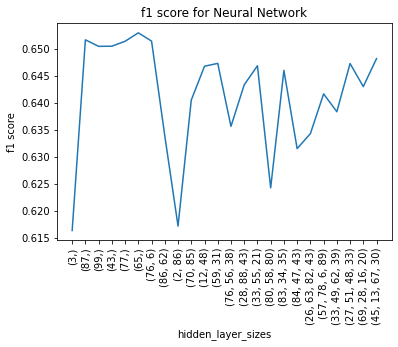

Neural Network:  0.6530413193828694  with hidden_layer_sizes =  (65,)  , max_iter =  1000  and learning_rate =  0.001


In [27]:
# hidden_layer_sizes_values = [(5, 5), (10, 10), (15, 15), (20, 20), (25, 25)]

plt.title("f1 score for Neural Network")
plt.ylabel("f1 score")
plt.xlabel("hidden_layer_sizes")
plt.xticks(np.arange(0, len(hidden_layer_sizes_values)*len(max_iter_values)*len(learning_rate_values), len(max_iter_values)*len(learning_rate_values)), hidden_layer_sizes_values, rotation = 90)
plt.plot(f1_scores_nn.flatten())
plt.show()

indices_max = np.unravel_index(np.argmax(f1_scores_nn, axis=None), f1_scores_nn.shape)
print("Neural Network: ", f1_scores_nn[indices_max], " with hidden_layer_sizes = ", hidden_layer_sizes_values[indices_max[0]], " , max_iter = ", max_iter_values[indices_max[1]], " and learning_rate = ", learning_rate_values[indices_max[2]])

In [ ]:
hidden_layer_sizes_values = [(25, 25), (60, 2), (60, 2, 10)]
# max_iter_values = [100, 200, 300, 400, 500] peut-être pas assez
max_iter_values = [1000]
learning_rate_values = [1e-3]

f1_scores_nnb = np.zeros((len(hidden_layer_sizes_values), len(max_iter_values), len(learning_rate_values)))

i = 0
for hidden_layer_sizes in hidden_layer_sizes_values:
    j = 0
    for max_iter in max_iter_values:
        k = 0
        for learning_rate in learning_rate_values:
            f1_scores_nnb[i,j,k], clf = neural_network(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter, learning_rate = learning_rate, solver = 'adam')
            k += 1
        j += 1
    i += 1

In [18]:
from sklearn.metrics import confusion_matrix

hidden_layer_sizes_values = [(87,), (99,), (43,), (77,), (65,), (76, 6)]

max_iter_values = [1000]
learning_rate_values = [1e-3]

f1_scores_nnb = np.zeros((len(hidden_layer_sizes_values), len(max_iter_values), len(learning_rate_values)))


liste_modeles = []
i = 0
for hidden_layer_sizes in hidden_layer_sizes_values:
    j = 0
    for max_iter in max_iter_values:
        k = 0
        for learning_rate in learning_rate_values:
            f1_scores_nnb[i,j,k], clf = neural_network(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter, learning_rate = learning_rate, solver = 'adam')
            liste_modeles.append(clf)
            print("Pour {} score de {}".format(hidden_layer_sizes, f1_scores_nnb[i,j,k]))
            print(confusion_matrix(y_test, clf.predict(X_test)))
            k += 1
        j += 1
    i += 1


Pour (3,) score de 0.6197020748359638
[[ 1013  2202    74     0]
 [  586  9396  3520    14]
 [   25  3197 10017   371]
 [    0   108  2770   541]]
Pour (87,) score de 0.6532186557900337
[[ 1487  1774    28     0]
 [  878  9543  3077    18]
 [   25  2912 10027   646]
 [    0    44  2331  1044]]
Pour (99,) score de 0.6510019507004788
[[1401 1866   22    0]
 [ 766 9598 3123   29]
 [  11 2897 9810  892]
 [   0   46 2156 1217]]
Pour (43,) score de 0.6540462256901342
[[ 1304  1961    24     0]
 [  629 10027  2837    23]
 [   12  3138  9779   681]
 [    0    45  2355  1019]]
Pour (77,) score de 0.6546669031152096
[[ 1521  1738    30     0]
 [  882  9440  3173    21]
 [   21  2787 10156   646]
 [    0    45  2341  1033]]
Pour (65,) score de 0.6522728616184903
[[1488 1774   27    0]
 [ 846 9579 3064   27]
 [  16 2913 9863  818]
 [   0   42 2238 1139]]
Pour (76, 6) score de 0.6549329077259561
[[ 1493  1767    29     0]
 [  843  9539  3121    13]
 [   19  2833 10229   529]
 [    0    43  2478   8

In [ ]:
plt.title("f1 score for Neural Network")
plt.ylabel("f1 score")
plt.xlabel("hidden_layer_sizes")
plt.xticks(np.arange(0, len(hidden_layer_sizes_values)*len(max_iter_values)*len(learning_rate_values), len(max_iter_values)*len(learning_rate_values)), hidden_layer_sizes_values, rotation = 90)
plt.plot(f1_scores_nn.flatten())
plt.show()

indices_max = np.unravel_index(np.argmax(f1_scores_nn, axis=None), f1_scores_nn.shape)
print("Neural Network: ", f1_scores_nn[indices_max], " with hidden_layer_sizes = ", hidden_layer_sizes_values[indices_max[0]], " , max_iter = ", max_iter_values[indices_max[1]], " and learning_rate = ", learning_rate_values[indices_max[2]])

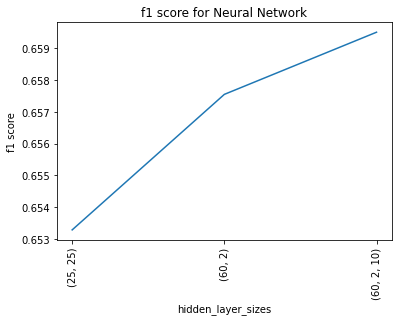

Neural Network:  0.6595122578157633  with hidden_layer_sizes =  (60, 2, 10)  , max_iter =  1000  and learning_rate =  0.001


In [ ]:
# hidden_layer_sizes_values = [(5, 5), (10, 10), (15, 15), (20, 20), (25, 25)]

plt.title("f1 score for Neural Network")
plt.ylabel("f1 score")
plt.xlabel("hidden_layer_sizes")
plt.xticks(np.arange(0, len(hidden_layer_sizes_values)*len(max_iter_values)*len(learning_rate_values), len(max_iter_values)*len(learning_rate_values)), hidden_layer_sizes_values, rotation = 90)
plt.plot(f1_scores_nnb.flatten())
plt.show()

indices_maxb = np.unravel_index(np.argmax(f1_scores_nnb, axis=None), f1_scores_nnb.shape)
print("Neural Network: ", f1_scores_nnb[indices_maxb], " with hidden_layer_sizes = ", hidden_layer_sizes_values[indices_maxb[0]], " , max_iter = ", max_iter_values[indices_maxb[1]], " and learning_rate = ", learning_rate_values[indices_maxb[2]])

# Model selection

[0.01778647 0.12713481 0.11433895 0.12318145 0.08374479 0.01845542
 0.01786639 0.14928068 0.12430436 0.08804409 0.0102362  0.01003063
 0.01289929 0.00981774 0.04020634 0.00999649 0.00981484 0.03286099]


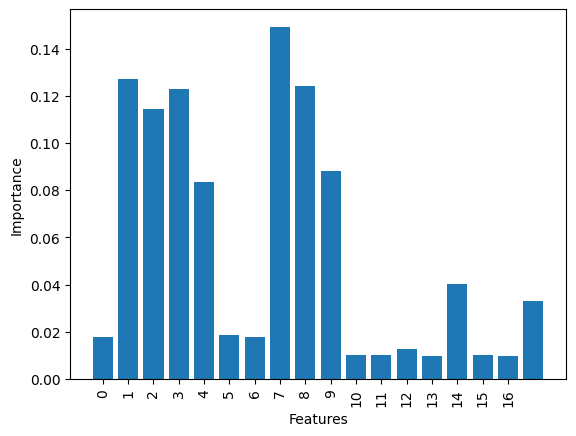

In [ ]:
print(clf.feature_importances_)
feature_importance = clf.feature_importances_

# plot feature importance
# xticks every 1
from matplotlib import pyplot
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
# 1 tick at every bar
plt.xticks(np.arange(0, 17, 1))
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_1 = np.delete(X_train, idx, axis=1)
X_test_1 = np.delete(X_test, idx, axis=1)

test_data_np_1 = np.delete(test_data_np, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)
clf_1 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_1.fit(X_train_1, y_train)
f1_score(y_test, clf_1.predict(X_test_1), average='micro')

0.6739067570606947

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_2 = np.delete(X_train_1, idx, axis=1)
X_test_2 = np.delete(X_test_1, idx, axis=1)

test_data_np_2 = np.delete(test_data_np_1, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_2 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_2.fit(X_train_2, y_train)
f1_score(y_test, clf_2.predict(X_test_2), average='micro')

0.6721717058124217

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_3 = np.delete(X_train_2, idx, axis=1)
X_test_3 = np.delete(X_test_2, idx, axis=1)

test_data_np_3 = np.delete(test_data_np_2, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_3 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_3.fit(X_train_3, y_train)
f1_score(y_test, clf_3.predict(X_test_3), average='micro')

0.6734569289592905

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_4 = np.delete(X_train_3, idx, axis=1)
X_test_4 = np.delete(X_test_3, idx, axis=1)

test_data_np_4 = np.delete(test_data_np_3, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_4 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_4.fit(X_train_4, y_train)
f1_score(y_test, clf_4.predict(X_test_4), average='micro')

0.6724930115991389

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_5 = np.delete(X_train_4, idx, axis=1)
X_test_5 = np.delete(X_test_4, idx, axis=1)

test_data_np_5 = np.delete(test_data_np_4, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_5 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_5.fit(X_train_5, y_train)
f1_score(y_test, clf_5.predict(X_test_5), average='micro')

0.6631751437843395

In [ ]:
feature_importance

array([0.0191594 , 0.12968221, 0.10829692, 0.13273063, 0.07986314,
       0.01759029, 0.14482088, 0.1347176 , 0.07959795, 0.01487757,
       0.03928966, 0.04325046], dtype=float32)

## Test set prediction

In [ ]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.8)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6734890595379622

In [ ]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.7)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6719789223403914

In [ ]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

NameError: name 'X_train_3' is not defined

In [ ]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=1)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6734569289592905

In [ ]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.6)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6729749702792147

In [ ]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.5)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

In [ ]:
best_model.get_params()

{'objective': 'multi:softmax',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1500,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 4}

In [ ]:
best_model = XGBClassifier()
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
f1_score(y_test, best_model.predict(X_test), average='micro')

1.0

In [ ]:
best_y_pred = best_model.predict(valid_data_np)
best_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
len(valid_data_np)

30000

In [ ]:
# Convert back y_pred to the original label and save it into submission.csv
y_final_pred = pd.DataFrame(best_y_pred, columns = ['Predicted'])

y_final_pred['Predicted'] = y_final_pred['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})
# insert column 'Id' to the first column
y_final_pred.insert(0, 'Id', range(1, 1 + len(y_final_pred)))

first_y_test = pd.read_csv('./data/test.csv')
y_final_pred['Id'] = first_y_test['Id']

# save the result to submission.csv
y_final_pred.to_csv('submission2.csv', index = False)

# analyze the result
y_final_pred['Predicted'].value_counts() / y_final_pred.shape[0]

Worst Concert Ever    0.999533
Did Not Enjoy         0.000467
Name: Predicted, dtype: float64

In [ ]:
y_final_pred['Predicted'].value_counts().sum()

30000

In [ ]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64